<a id=top-page></a>
# Generate images for Fig. 1

***

In [1]:
import numpy as np
import cmcrameri.cm as cmc
import matplotlib.pyplot as plt
from pykitPIV import Particle, FlowField, Motion, Image

In [2]:
n_images = 2

In [22]:
image_size = (300,300)

In [23]:
size_buffer = 10

In [24]:
figsize = (6,3.5)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [25]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(2,4),
                     distances=(1,2),
                     densities=(0.2,0.26),
                     signal_to_noise=(5,20),
                     diameter_std=0.5,
                     seeding_mode='random', 
                     random_seed=100)

In [26]:
image = Image(random_seed=100)

In [27]:
image.add_particles(particles)

Particles added to the image.


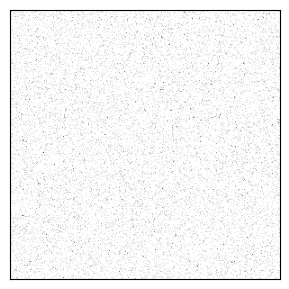

In [28]:
image.plot(0, 
           with_buffer=False,
           cmap='Greys',
           xticks=False,
           yticks=False,
           figsize=figsize, 
           filename='Particle.svg');

In [29]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=200)

In [30]:
flowfield.generate_random_velocity_field(gaussian_filters=(10,11),
                                         n_gaussian_filter_iter=20,
                                         displacement=(0,10))

In [31]:
image.add_flowfield(flowfield)

Velocity field added to the image.


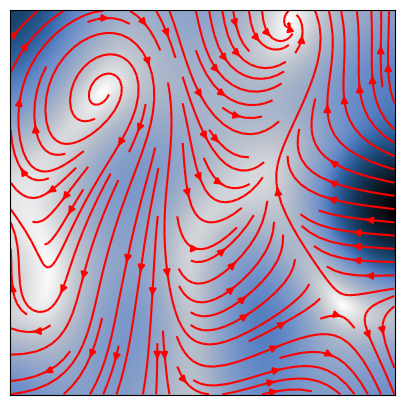

In [42]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    add_streamplot=True,
                                    streamplot_density=1,
                                    streamplot_color='r',
                                    cmap=cmc.oslo_r,
                                    cbar=False,
                                    figsize=(5,5),
                                    # filename='FlowField.svg');
                                    filename='Image_plot_velocity_field_magnitude.png');

<a id=add-movement></a>
***

## Add movement to particles

[Go to the top](#top-page)

In [33]:
motion = Motion(particles, 
                flowfield, 
                time_separation=1)

In [34]:
motion.forward_euler(n_steps=10)

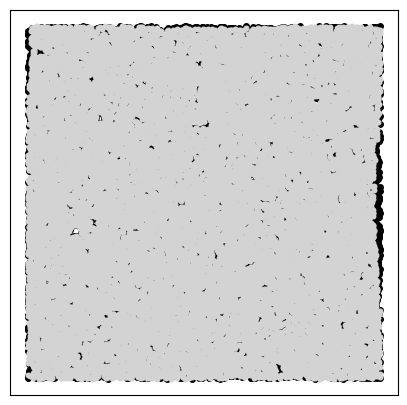

In [35]:
motion.plot_particle_motion(0,
                            s=16,
                            xticks=False,
                            yticks=False,
                            color_I2='#d3d3d3',
                            figsize=(5,5),
                            filename='Motion.svg');

<a id=add-movement-visualize></a>

#### Visualize the PIV image pair:

[Go to the top](#top-page)

In [36]:
image.add_motion(motion)

Particle movement added to the image.


In [37]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/20)

Reflected light added to images I1.
Reflected light added to images I2.


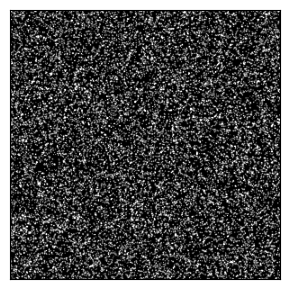

In [38]:
image.plot(0, 
           instance=1,
           with_buffer=False,
           xticks=False,
           yticks=False,
           cmap='Greys_r',
           figsize=figsize, 
           filename='Image-1.svg');

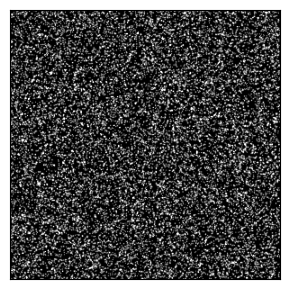

In [39]:
image.plot(0, 
           instance=2,
           with_buffer=False,
           xticks=False,
           yticks=False,
           cmap='Greys_r',
           figsize=figsize, 
           filename='Image-2.svg');

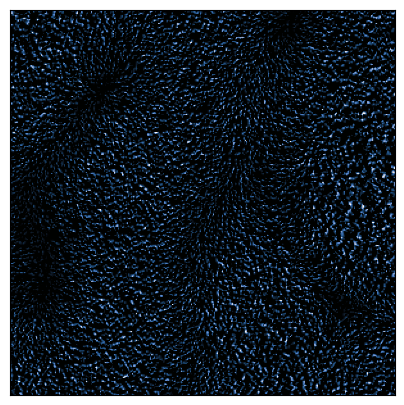

In [47]:
image.plot_image_pair(0,
                      with_buffer=False,
                      xticks=False,
                      yticks=False,
                      cmap=cmc.oslo,
                      figsize=(5,5), 
                      filename='Image_plot_image_pair.png');

***